In [2]:
# pip install adtk seaborn matplotlib pandas yfinance

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import (
    ThresholdAD, QuantileAD, InterQuartileRangeAD, 
    GeneralizedESDTestAD, PersistAD, VolatilityShiftAD
)

Anomaly Detection Toolkit (ADTK) ‚Äì Outil de D√©tection d'Anomalies
Anomaly Detection Toolkit (ADTK) est une biblioth√®que Python con√ßue pour la d√©tection d‚Äôanomalies dans les s√©ries temporelles, en utilisant des approches non supervis√©es ou bas√©es sur des r√®gles.

La nature des anomalies varie selon les cas, ce qui signifie qu‚Äôun seul mod√®le ne peut pas convenir √† toutes les situations. La cl√© du succ√®s dans la d√©tection d‚Äôanomalies repose sur le choix et la combinaison de trois √©l√©ments :

Les algorithmes de d√©tection (detectors),
Les m√©thodes d‚Äôing√©nierie des caract√©ristiques (transformers),
Les m√©thodes d‚Äôagr√©gation (aggregators).
Cette biblioth√®que propose un ensemble de d√©tecteurs, de transformateurs et d'agr√©gateurs avec des APIs unifi√©es, ainsi que des classes de pipeline permettant de les connecter pour former un mod√®le complet. Elle inclut √©galement plusieurs fonctions de traitement et de visualisation des s√©ries temporelles et des √©v√©nements anormaux.

 En r√©sum√© : ADTK facilite la d√©tection des anomalies dans les s√©ries temporelles gr√¢ce √† une approche modulaire et flexible.

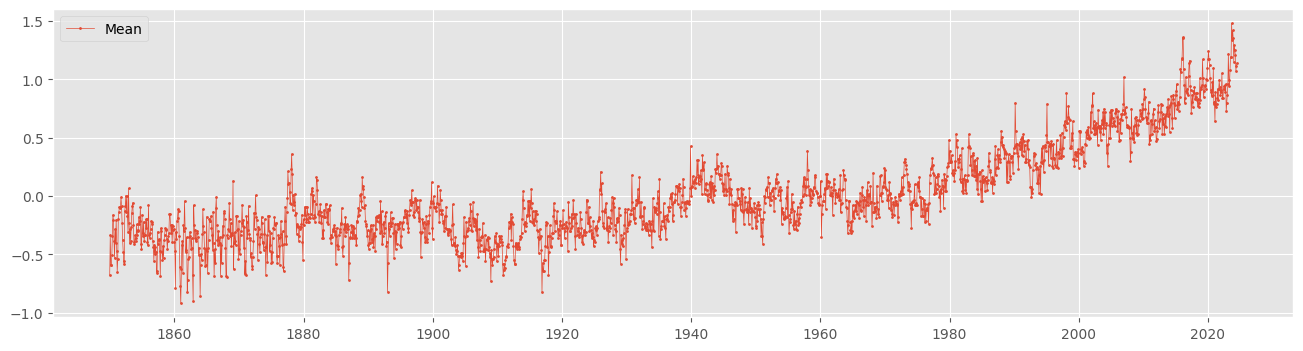

In [4]:


# üîπ Fix: Override Matplotlib Style
plt.style.use("ggplot")  # Use ggplot instead of seaborn-whitegrid

# üîπ Step 1: Load CSV and clean column names
df = pd.read_csv("temperature.csv")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df = df[["Year", "Mean"]]  # Keep only required columns

# üîπ Step 2: Convert "Year" column to datetime and set as index
df["Year"] = pd.to_datetime(df["Year"], format="%Y-%m")
df = df.set_index("Year")

# üîπ Step 3: Select "Mean" column for time-series analysis
s_train = df["Mean"]

# üîπ Step 4: Validate the time series format
s_train = validate_series(s_train)

# üîπ Step 5: Plot the original data
plot(s_train)
plt.show()

# üìå D√©tection d‚ÄôAnomalies : Seuils et Quantiles

On commence deux m√©thodes classiques de **d√©tection d‚Äôanomalies** en utilisant la biblioth√®que **ADTK (Anomaly Detection Toolkit)** :  
- **D√©tection par seuils fixes** (`ThresholdAD`)  
- **D√©tection par quantiles statistiques** (`QuantileAD`)  

Ces approches permettent d‚Äôidentifier les valeurs extr√™mes dans une s√©rie temporelle en fonction de crit√®res pr√©d√©finis.

---

## üîπ **1. D√©tection d‚ÄôAnomalies Bas√©e sur des Seuils (Threshold Anomaly Detection)**

Le prochain bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur des seuils fixes** √† l‚Äôaide de la classe `ThresholdAD` du module **ADTK**.  
Cette m√©thode identifie les valeurs anormales en d√©finissant **un seuil maximum (`high=0.75`) et un seuil minimum (`low=-0.5`)**.

### **üìå Principe de la D√©tection par Seuils :**
Le d√©tecteur `ThresholdAD` compare chaque valeur de la s√©rie temporelle `s_train` √† ces seuils :
- **Si une valeur d√©passe `0.75`**, elle est consid√©r√©e comme une **anomalie positive**.
- **Si une valeur est inf√©rieure √† `-0.5`**, elle est consid√©r√©e comme une **anomalie n√©gative**.

Une fois la d√©tection effectu√©e via la m√©thode `.detect(s_train)`, le r√©sultat (`anomalies`) est utilis√© pour **visualiser les points anormaux** sur la courbe de la s√©rie temporelle gr√¢ce √† la fonction `plot()`.

- **Les anomalies sont affich√©es en rouge** (`anomaly_color="red"`).
- **Elles sont marqu√©es sur la courbe** (`anomaly_tag="marker"`).
- `plt.show()` est appel√© pour **afficher le graphique**, permettant d‚Äôanalyser visuellement les anomalies identifi√©es.

### ‚úÖ **Avantages :**
‚úî **M√©thode simple et rapide**, facile √† impl√©menter.  
‚úî Fonctionne bien lorsque les **seuils sont bien d√©finis** √† l‚Äôavance.  
‚úî Permet une **d√©tection instantan√©e** des anomalies sans apprentissage.  

### ‚ö† **Inconv√©nients :**
‚ùå **Ne s‚Äôadapte pas automatiquement** aux variations des donn√©es.  
‚ùå **D√©pend fortement des valeurs choisies** pour `high` et `low`.  
‚ùå **Ne prend pas en compte la distribution des donn√©es**, ce qui peut entra√Æner des **faux positifs ou n√©gatifs**.  

---



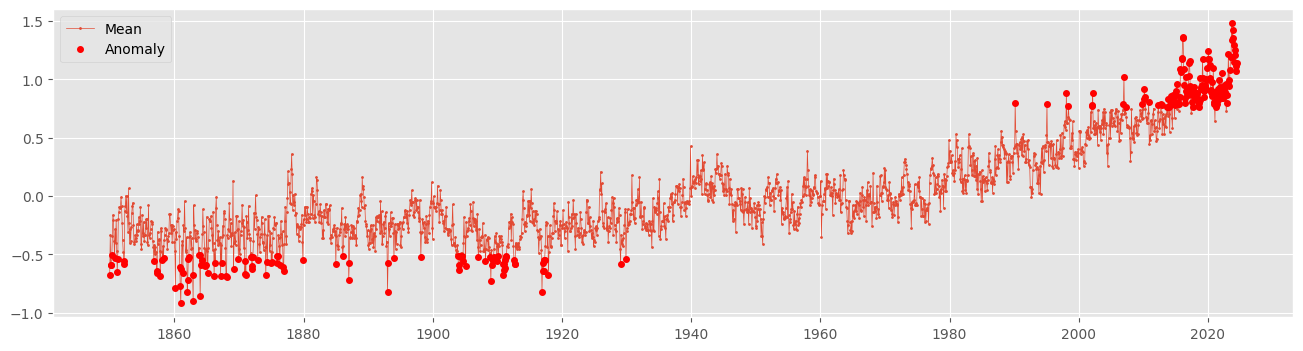

In [3]:
# =============================
# üîπ Threshold Anomaly Detection
# =============================
threshold_ad = ThresholdAD(high=0.75, low=-0.5)
anomalies = threshold_ad.detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

# üìå Quantile Anomaly Detection

Le prochain bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur les quantiles** √† l‚Äôaide de la classe `QuantileAD` du module **ADTK**. Contrairement √† la m√©thode des seuils fixes, cette approche identifie les anomalies en fonction des **quantiles statistiques** des donn√©es.

---

## üîπ **.2 D√©tection d‚ÄôAnomalies Bas√©e sur les Quantiles (Quantile Anomaly Detection)**

Le prochain bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur les quantiles** √† l‚Äôaide de la classe `QuantileAD` du module **ADTK**. Contrairement √† la m√©thode des seuils fixes, cette approche identifie les anomalies en fonction des **quantiles statistiques** des donn√©es.

### **üìå Principe de la D√©tection par Quantiles :**
- **`high=0.99`** ‚Üí Toute valeur situ√©e au-del√† du **99·µâ centile** est consid√©r√©e comme une **anomalie**.  
- **`low=0.01`** ‚Üí Toute valeur en dessous du **1·µâ ≥ centile** est √©galement consid√©r√©e comme une **anomalie**.  

L‚Äôutilisation de `.fit_detect(s_train)` signifie que le d√©tecteur va **calculer automatiquement** les valeurs de seuil √† partir de la distribution des donn√©es de `s_train`, puis appliquer la d√©tection d‚Äôanomalies.

Une fois les anomalies d√©tect√©es (`anomalies`), elles sont visualis√©es sur le graphique avec la fonction `plot()`, o√π :

- **Les anomalies sont affich√©es en rouge** (`anomaly_color="red"`).
- **Elles sont marqu√©es sur la courbe** (`anomaly_tag="marker"`).
- `plt.show()` permet **d‚Äôafficher le graphique**, facilitant l‚Äôanalyse visuelle des anomalies extr√™mes dans la s√©rie temporelle.

### ‚úÖ **Avantages :**
‚úî **M√©thode non param√©trique**, s‚Äôadapte automatiquement √† la distribution des donn√©es.  
‚úî **Id√©ale pour les s√©ries temporelles avec de nombreuses valeurs extr√™mes**.  
‚úî **Simple √† mettre en ≈ìuvre** et fonctionne bien lorsque la distribution des donn√©es est bien d√©finie.  
‚úî Permet **de filtrer les anomalies sans connaissance pr√©alable des seuils absolus**.  

### ‚ö† **Inconv√©nients :**
‚ùå **D√©pend fortement de la distribution des donn√©es**, ce qui peut entra√Æner des **faux positifs ou n√©gatifs** si la distribution est biais√©e.  
‚ùå **Ne tient pas compte du contexte temporel**, une valeur extr√™me peut √™tre normale selon la saison ou la tendance.  
‚ùå **Sensibilit√© au choix des quantiles (`high` et `low`)**, un mauvais r√©glage peut fausser la d√©tection.  
‚ùå Moins efficace sur **des s√©ries tr√®s bruit√©es** o√π il y a beaucoup de variations rapides.  

---

## üöÄ **Conclusion**
- **ThresholdAD** est utile si **vous connaissez bien vos seuils**, mais il ne s‚Äôadapte pas aux changements de distribution.  
- **QuantileAD** est **plus flexible**, mais n√©cessite une **bonne compr√©hension de la distribution** des donn√©es.  
- Pour des s√©ries **fortement dynamiques**, d‚Äôautres m√©thodes comme **IQR ou ESD** peuvent √™tre plus adapt√©es.  

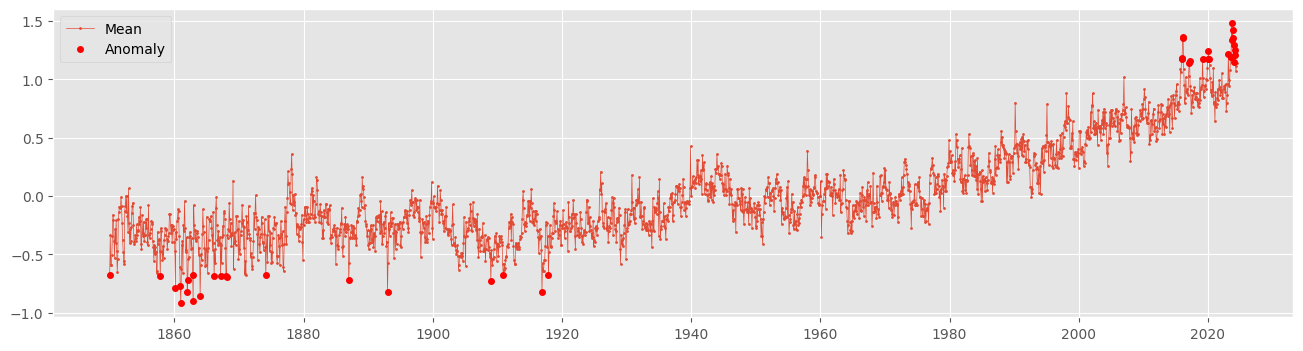

In [4]:

# =============================
# üîπ Quantile Anomaly Detection
# =============================
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


#  D√©tection d‚ÄôAnomalies bas√©e sur l‚ÄôIntervalle Interquartile (IQR)

Le prochain bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur l‚Äôintervalle interquartile (IQR)** en utilisant la classe `InterQuartileRangeAD` du module **ADTK**.  
Cette m√©thode est bas√©e sur la dispersion des donn√©es et permet d‚Äôidentifier les valeurs **consid√©rablement √©loign√©es** de la distribution centrale.

## üîπ Principe de l‚ÄôInter Quartile Range (IQR) :
L‚Äô**IQR** est d√©fini comme la **diff√©rence entre le troisi√®me quartile (Q3) et le premier quartile (Q1)** :  
\[
IQR = Q3 - Q1
\]
- Toute valeur qui d√©passe **Q3 + c √ó IQR** ou qui est en dessous de **Q1 - c √ó IQR** est consid√©r√©e comme une anomalie.  
- **Ici, `c=1.5`** signifie que l'on utilise un seuil **1,5 fois l‚Äôintervalle interquartile** pour d√©terminer les valeurs extr√™mes.

## üîπ Avantages et Inconv√©nients
### ‚úÖ **Avantages :**
‚úî M√©thode robuste aux valeurs aberrantes mod√©r√©es car elle repose sur une dispersion statistique.

‚úî Aucune hypoth√®se sur la distribution des donn√©es, contrairement au Test ESD qui suppose une normalit√©.

‚úî Facile √† interpr√©ter et impl√©menter avec un seul param√®tre c ajustable.

‚úî Fonctionne bien sur des donn√©es stationnaires sans grandes variations de tendance.

### ‚ö† **Inconv√©nients :**
‚ùå Moins efficace sur les s√©ries temporelles avec des tendances fortes, car l‚ÄôIQR ne prend pas en compte l‚Äô√©volution temporelle.

‚ùå Ne d√©tecte pas toujours les anomalies contextuelles, car il ne consid√®re pas la corr√©lation temporelle.

‚ùå Sensibilit√© au choix du facteur c, un mauvais r√©glage peut entra√Æner trop ou trop peu d‚Äôanomalies d√©tect√©es.

‚ùå Moins performant pour les petits ensembles de donn√©es, car les quartiles peuvent √™tre instables sur un √©chantillon r√©duit.


**üöÄ Cette m√©thode est id√©ale pour d√©tecter des valeurs extr√™mes dans des distributions homog√®nes, mais elle doit √™tre utilis√©e avec prudence sur des s√©ries temporelles pr√©sentant des tendances marqu√©es.**


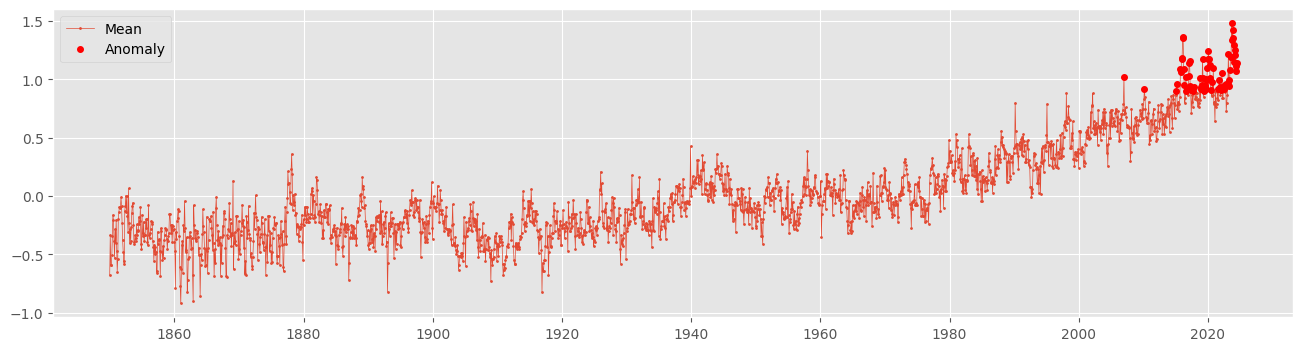

In [5]:

# =========================================
# üîπ Inter Quartile Range Anomaly Detection
# =========================================
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


# üìå D√©tection d‚ÄôAnomalies avec le **Generalized Extreme Studentized Deviate (ESD) Test**

Ce bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur le test ESD g√©n√©ralis√©** (**Generalized Extreme Studentized Deviate Test**), √† l‚Äôaide de la classe `GeneralizedESDTestAD` du module **ADTK**.  
Ce test est particuli√®rement efficace pour identifier **des valeurs extr√™mes dans une distribution normale**.

---

## üîπ Principe du **Generalized ESD Test** :
Le test **ESD g√©n√©ralis√©** est une m√©thode statistique utilis√©e pour **d√©tecter des valeurs aberrantes** dans un jeu de donn√©es en supposant que les valeurs suivent **une distribution normale**.

1. **Calcul du score de Student (Z-score) :**  
   Pour chaque point, on calcule son **degr√© d‚Äô√©loignement** par rapport √† la moyenne en fonction de l‚Äô√©cart-type.

2. **D√©tection des anomalies :**  
   - On identifie les valeurs ayant un **Z-score trop √©lev√©**.
   - On les retire progressivement en recalculant la moyenne et l'√©cart-type √† chaque √©tape.
   - On applique un **seuil statistique bas√© sur l‚Äôalpha**.

3. **Interpr√©tation du param√®tre `alpha` :**  
   - **`alpha=0.3`** signifie que l'on accepte une **probabilit√© de 30% de faux positifs**.
   - Plus `alpha` est petit, plus le mod√®le sera strict dans la d√©tection des anomalies.

---

## üîπ Avantages et Inconv√©nients

### ‚úÖ **Avantages :**
‚úî Tr√®s efficace pour **d√©tecter des valeurs extr√™mes** dans une s√©rie temporelle.  
‚úî Approche **statistiquement fond√©e**, permettant une d√©tection fiable des anomalies.  
‚úî Adapt√© aux jeux de donn√©es **de taille mod√©r√©e √† grande**.  
‚úî Permet **un contr√¥le fin de la sensibilit√©** gr√¢ce au param√®tre `alpha`.  

### ‚ö† **Inconv√©nients :**
‚ùå Suppose que les donn√©es suivent une **distribution normale**, ce qui peut ne pas √™tre toujours le cas.  
‚ùå Sensible aux **donn√©es fortement asym√©triques ou bruit√©es**.  
‚ùå Peut **n√©gliger certaines anomalies** si elles ne sont pas consid√©r√©es comme statistiquement significatives.  
‚ùå Le choix de `alpha` peut **influencer fortement les r√©sultats** et n√©cessite des ajustements exp√©rimentaux.  

---

 **Cette m√©thode est particuli√®rement utile pour d√©tecter des valeurs extr√™mes dans des s√©ries temporelles suppos√©es normales, mais elle doit √™tre utilis√©e avec prudence lorsque les donn√©es pr√©sentent des distributions non gaussiennes.** 


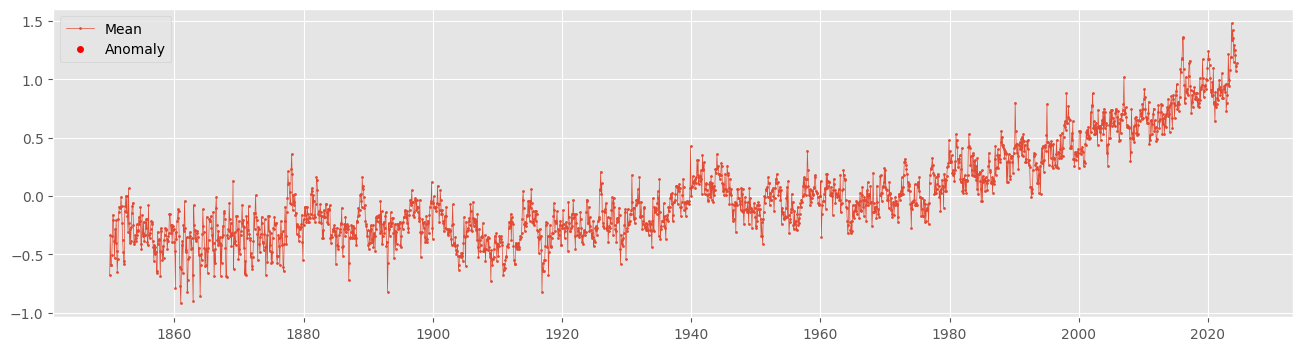

In [8]:
# ============================================
# üîπ Generalized Extreme Studentized Deviate (ESD) Test
# ============================================
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()


---

## üîπ **. D√©tection d‚ÄôAnomalies Persistantes (Persist Anomaly Detection - Positive)**

Le prochain bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur la persistance** √† l‚Äôaide de la classe `PersistAD` du module **ADTK**.  
Cette m√©thode identifie les **changements soudains et persistants** dans une s√©rie temporelle.

### **üìå Principe de la D√©tection Persistante :**
- Compare chaque valeur aux **24 derni√®res valeurs (`window=24`)**.
- Une valeur est consid√©r√©e comme **anormale si elle augmente brusquement** et d√©passe **`c=3.0`** fois l‚Äô√©cart-type.
- `side='positive'` signifie que **seules les hausses anormales sont d√©tect√©es**.

### ‚úÖ **Avantages :**
‚úî **Tr√®s utile pour d√©tecter des tendances inhabituelles**.  
‚úî **Prend en compte les tendances r√©centes**, ce qui r√©duit les faux positifs li√©s aux fluctuations normales.  
‚úî **Convient aux s√©ries temporelles o√π les anomalies ne sont pas seulement des valeurs extr√™mes, mais aussi des changements de tendance**.  

### ‚ö† **Inconv√©nients :**
‚ùå **N√©cessite un bon r√©glage de `c` et `window`**, sinon il peut manquer certaines anomalies ou g√©n√©rer trop de faux positifs.  
‚ùå **Moins adapt√© aux s√©ries temporelles tr√®s bruit√©es**, o√π des fluctuations normales peuvent √™tre d√©tect√©es √† tort comme des anomalies.  
‚ùå **Ne d√©tecte que les anomalies positives**, il faudra un autre mod√®le pour les baisses anormales (`side='negative'`).  

---

## üìå Comparaison des M√©thodes

| **M√©thode**      | **Approche**                               | **Avantages** | **Inconv√©nients** |
|------------------|------------------------------------------|--------------|----------------|
| **ThresholdAD**  | Seuils fixes (`high`, `low`)            | Simple, rapide, pas besoin d‚Äôapprentissage | D√©pend fortement des seuils choisis, statique |
| **QuantileAD**   | D√©tection bas√©e sur les quantiles (`0.99`, `0.01`) | S‚Äôadapte aux donn√©es, √©vite le choix manuel des seuils | Peut √™tre inefficace si la distribution est irr√©guli√®re |
| **PersistAD**    | Comparaison avec les valeurs pr√©c√©dentes (`c=3.0`, `window=24`) | Capable de d√©tecter des tendances anormales | Sensible au bruit, n√©cessite un bon r√©glage des param√®tres |

---

## üöÄ **Conclusion**
- **ThresholdAD** est utile si **vous connaissez bien vos seuils**, mais il ne s‚Äôadapte pas aux changements de distribution.  
- **QuantileAD** est **plus flexible**, mais n√©cessite une **bonne compr√©hension de la distribution** des donn√©es.  
- **PersistAD** est id√©al pour d√©tecter **des tendances anormales** mais doit √™tre bien param√©tr√© (`c`, `window`).  


E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().

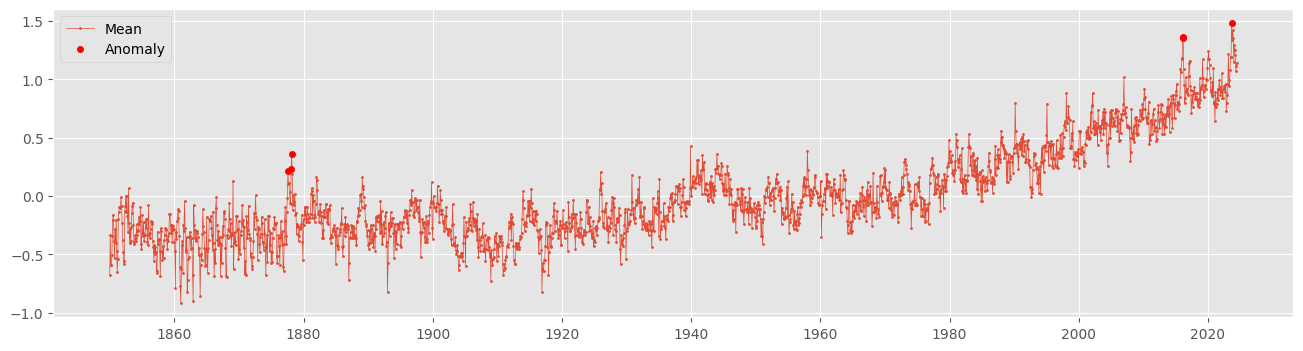

In [10]:

# ==================================
# üîπ Persist Anomaly Detection (Positive)
# ==================================
persist_ad = PersistAD(c=3.0, side='positive', window=24)
anomalies = persist_ad.fit_detect(s_train)
#plot(s_train, anomaly=anomalies, anomaly_color="red")
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

---

## üîπ **. D√©tection d‚ÄôAnomalies Persistantes N√©gatives (Persist Anomaly Detection - Negative)**

Ce bloc de code met en ≈ìuvre une **d√©tection d‚Äôanomalies bas√©e sur la persistance des baisses soudaines** avec `PersistAD`.

### **üìå Principe :**
- Analyse les valeurs **par rapport aux 24 pr√©c√©dentes (`window=24`)**.
- Une baisse **forte et persistante** est consid√©r√©e comme une **anomalie si elle est `1.5` fois plus faible que la moyenne mobile**.
- **`side='negative'`** signifie que **seules les baisses anormales sont d√©tect√©es**.

### ‚úÖ **Avantages :**
‚úî **Id√©al pour rep√©rer des d√©gradations soudaines** (ex : baisse brutale d‚Äôun indicateur).  
‚úî **Tient compte des tendances r√©centes**, contrairement aux m√©thodes purement statistiques.  
‚úî **R√©glable facilement via `c` et `window`** pour s‚Äôadapter √† diff√©rentes donn√©es.  

### ‚ö† **Inconv√©nients :**
‚ùå **Risque de d√©tecter des baisses normales comme anomalies** si `c` est mal r√©gl√©.  
‚ùå **Moins efficace sur des s√©ries tr√®s volatiles**, car les variations naturelles peuvent √™tre consid√©r√©es comme anormales.  
‚ùå **Ne d√©tecte que les baisses**, un autre mod√®le doit √™tre utilis√© pour les hausses (`side='positive'`).  

---

## üìå Comparaison des M√©thodes

| **M√©thode**      | **Approche**                               | **Avantages** | **Inconv√©nients** |
|------------------|------------------------------------------|--------------|----------------|
| **ThresholdAD**  | Seuils fixes (`high`, `low`)            | Simple, rapide, pas besoin d‚Äôapprentissage | D√©pend fortement des seuils choisis, statique |
| **QuantileAD**   | D√©tection bas√©e sur les quantiles (`0.99`, `0.01`) | S‚Äôadapte aux donn√©es, √©vite le choix manuel des seuils | Peut √™tre inefficace si la distribution est irr√©guli√®re |
| **PersistAD (+)** | D√©tecte les hausses soudaines (`c=3.0`) | Capable de d√©tecter des tendances anormales | Sensible au bruit, n√©cessite un bon r√©glage des param√®tres |
| **PersistAD (-)** | D√©tecte les baisses soudaines (`c=1.5`) | Utile pour surveiller des d√©gradations | Peut g√©n√©rer des faux positifs sur des s√©ries volatiles |

---

## üöÄ **Conclusion**
- **ThresholdAD** fonctionne bien si les seuils sont bien d√©finis.  
- **QuantileAD** est plus flexible mais d√©pend de la distribution des donn√©es.  
- **PersistAD (Positive & Negative)** est id√©al pour d√©tecter des **tendances anormales**, mais doit √™tre bien param√©tr√©.  

üìå **Prochaine √©tape : Exp√©rimenter ces m√©thodes sur diff√©rentes s√©ries temporelles !** üéØ

E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().

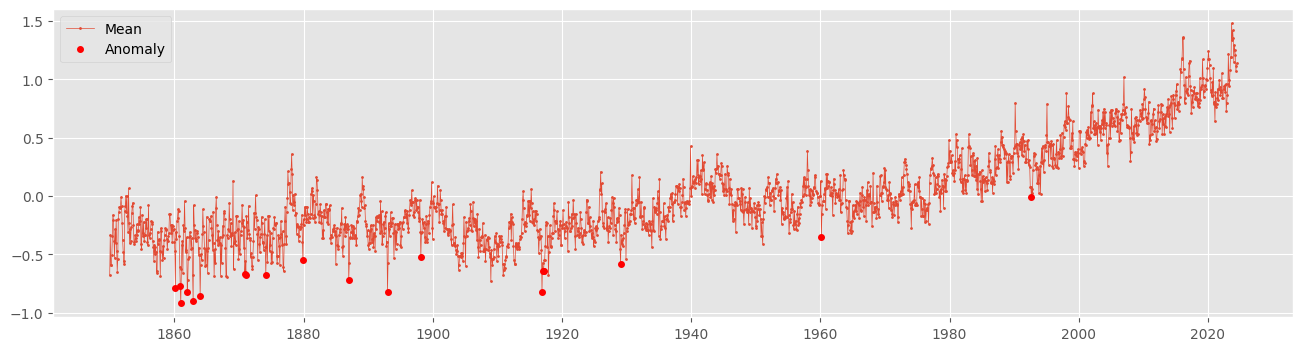

In [11]:
# ==================================
# üîπ Persist Anomaly Detection (Negative)
# ==================================
persist_ad = PersistAD(c=1.5, side='negative', window=24)
anomalies = persist_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

---

## üîπ **5. D√©tection d‚ÄôAnomalies Bas√©e sur les Changements de Volatilit√© (Volatility Shift Anomaly Detection)**

Ce bloc de code met en ≈ìuvre une **d√©tection des anomalies li√©es aux variations soudaines de volatilit√©** √† l‚Äôaide de `VolatilityShiftAD`.  
Les donn√©es utilis√©es sont r√©cup√©r√©es depuis **Yahoo Finance** pour le titre **Tesla (TSLA)**.

### **üìå Principe :**
- L‚Äôalgorithme d√©tecte les p√©riodes o√π **la volatilit√© change brusquement** par rapport aux 30 p√©riodes pr√©c√©dentes (`window=30`).
- Une **hausse significative de la volatilit√©** est signal√©e si elle d√©passe **`c=6.0`** fois l‚Äô√©cart-type.
- **`side='positive'`** signifie que **seules les hausses anormales de volatilit√© sont d√©tect√©es**.

### ‚úÖ **Avantages :**
‚úî **Id√©al pour l‚Äôanalyse des march√©s financiers**, o√π les fluctuations anormales de prix peuvent signaler des √©v√©nements majeurs.  
‚úî **D√©tecte les changements de volatilit√© et non juste des valeurs extr√™mes**, ce qui peut √™tre plus pertinent dans certains contextes.  
‚úî **Applicable aux s√©ries temporelles o√π une augmentation soudaine de la variation est un signe d‚Äôanomalie** (ex : capteurs industriels, trafic r√©seau, bourse).  

### ‚ö† **Inconv√©nients :**
‚ùå **N√©cessite des donn√©es suffisamment longues** pour bien capter les changements de volatilit√©.  
‚ùå **Peut √™tre inefficace sur des s√©ries peu volatiles**, o√π les changements sont rares.  
‚ùå **D√©pend de `c` et `window`**, un mauvais r√©glage peut entra√Æner des faux positifs ou ignorer certaines anomalies importantes.  

---

## üìå Comparaison des M√©thodes

| **M√©thode**      | **Approche**                               | **Avantages** | **Inconv√©nients** |
|------------------|------------------------------------------|--------------|----------------|
| **ThresholdAD**  | Seuils fixes (`high`, `low`)            | Simple, rapide, pas besoin d‚Äôapprentissage | D√©pend fortement des seuils choisis, statique |
| **QuantileAD**   | D√©tection bas√©e sur les quantiles (`0.99`, `0.01`) | S‚Äôadapte aux donn√©es, √©vite le choix manuel des seuils | Peut √™tre inefficace si la distribution est irr√©guli√®re |
| **PersistAD (+)** | D√©tecte les hausses soudaines (`c=3.0`) | Capable de d√©tecter des tendances anormales | Sensible au bruit, n√©cessite un bon r√©glage des param√®tres |
| **PersistAD (-)** | D√©tecte les baisses soudaines (`c=1.5`) | Utile pour surveiller des d√©gradations | Peut g√©n√©rer des faux positifs sur des s√©ries volatiles |
| **VolatilityShiftAD** | D√©tecte les changements soudains de volatilit√© (`c=6.0`, `window=30`) | Tr√®s utile pour la finance et l‚Äôindustrie | N√©cessite un bon r√©glage et des donn√©es volatiles |


[*********************100%***********************]  1 of 1 completed
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\detector\_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
E:\apps\miniconda3\envs\s1\lib\site-packages\adtk\aggregator\_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly ca

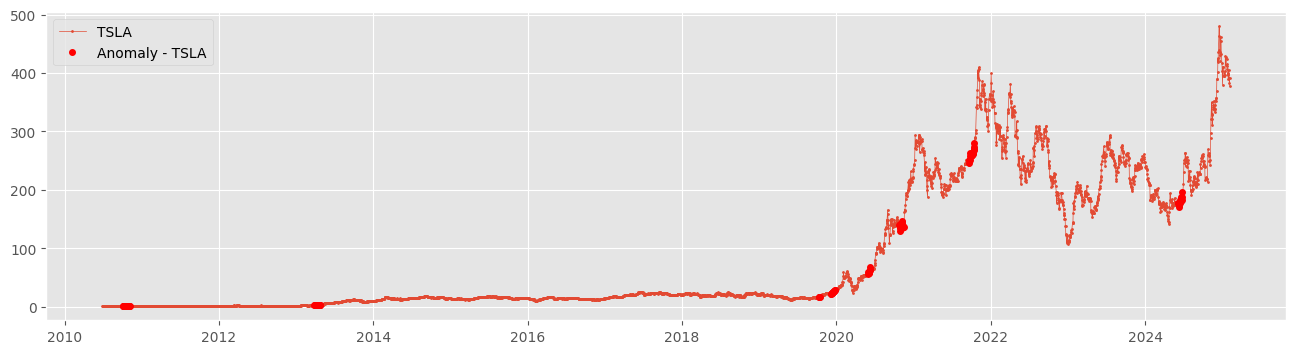

In [12]:

# ==================================
# üîπ Volatility Shift Anomaly Detection (Yahoo Finance Data)
# ==================================
try:
    s_train = yf.download("TSLA")['Close']
    s_train = validate_series(s_train)

    volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
    anomalies = volatility_shift_ad.fit_detect(s_train)
    plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
    plt.show()
except Exception as e:
    print(f"Yahoo Finance Data Download Error: {e}")
